In [1]:
# !pip install spotipy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install ipython

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Spotify API credentials
SPOTIPY_CLIENT_ID = 'your_client_id'
SPOTIPY_CLIENT_SECRET = 'your_client_secret'
SPOTIPY_REDIRECT_URI = 'http://localhost:8080/callback'

In [4]:
# Initialize Spotify client
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID,
                                               client_secret=SPOTIPY_CLIENT_SECRET,
                                               redirect_uri=SPOTIPY_REDIRECT_URI,
                                               scope='user-top-read'))


In [5]:
def fetch_top_tracks(sp, limit=10):
    """Fetch the top tracks for the authenticated user."""
    top_tracks = sp.current_user_top_tracks(limit=limit, time_range='medium_term')
    track_data = []
    for track in top_tracks['items']:
        track_data.append({
            'track_id': track['id'],
            'track_name': track['name'],
            'artist': track['artists'][0]['name'],
            'popularity': track['popularity']
        })
    return pd.DataFrame(track_data)


In [7]:
def display_top_tracks(top_tracks_data):
    """Display top tracks data as a table."""
    display(top_tracks_data)

In [6]:
def plot_top_tracks(top_tracks_data):
    """Plot the top tracks data."""
    plt.figure(figsize=(12, 8))
    sns.barplot(x='popularity', y='track_name', data=top_tracks_data, palette='viridis')
    plt.title('Top 10 Most Listened Songs')
    plt.xlabel('Popularity')
    plt.ylabel('Song')
    plt.show()

In [10]:
def plot_most_played_artists(top_tracks_data):
    """Plot the most played artists based on popularity."""
    artist_popularity = top_tracks_data.groupby('artist')['popularity'].sum().reset_index()
    artist_popularity = artist_popularity.sort_values(by='popularity', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='popularity', y='artist', data=artist_popularity, palette='magma')
    plt.title('Most Played Artists')
    plt.xlabel('Total Popularity')
    plt.ylabel('Artist')
    plt.show()

In [8]:
def main():
    # Fetch top 10 tracks
    top_tracks_data = fetch_top_tracks(sp, limit=10)
    
    # Print top 10 tracks
    print("Top 10 Most Listened Songs:")
    display_top_tracks(top_tracks_data)
    
    
    # Plot top tracks
    plot_top_tracks(top_tracks_data)    

    # Plot most played artists
    plot_most_played_artists(top_tracks_data)

Top 10 Most Listened Songs:


,track_id,track_name,artist,popularity
0,4m0q0xQ2BNl9SCAGKyfiGZ,Somebody Else,The 1975,71
1,5DZNSYxhFA1WA9WEJg9TNY,Dreaming of You,Cigarettes After Sex,64
2,3e7sxremeOE3wTySiOhGiP,Dusk Till Dawn (feat. Sia) - Radio Edit,ZAYN,81
3,5ivRSlOhVIXN2QMzqgsX0s,Aaoge Tum Kabhi,The Local Train,70
4,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,85
5,73jVPicY2G9YHmzgjk69ae,Robbers,The 1975,69
6,4xDwCYhobDehSBGUmd5H6Y,FEEL NOTHING,The Plot In You,68
7,55n9yjI6qqXh5F2mYvUc2y,I Don’t Wanna Live Forever (Fifty Shades Darker),ZAYN,79
8,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,89
9,3zHq9ouUJQFQRf3cm1rRLu,"Love Me Like You Do - From ""Fifty Shades Of Grey""",Ellie Goulding,75


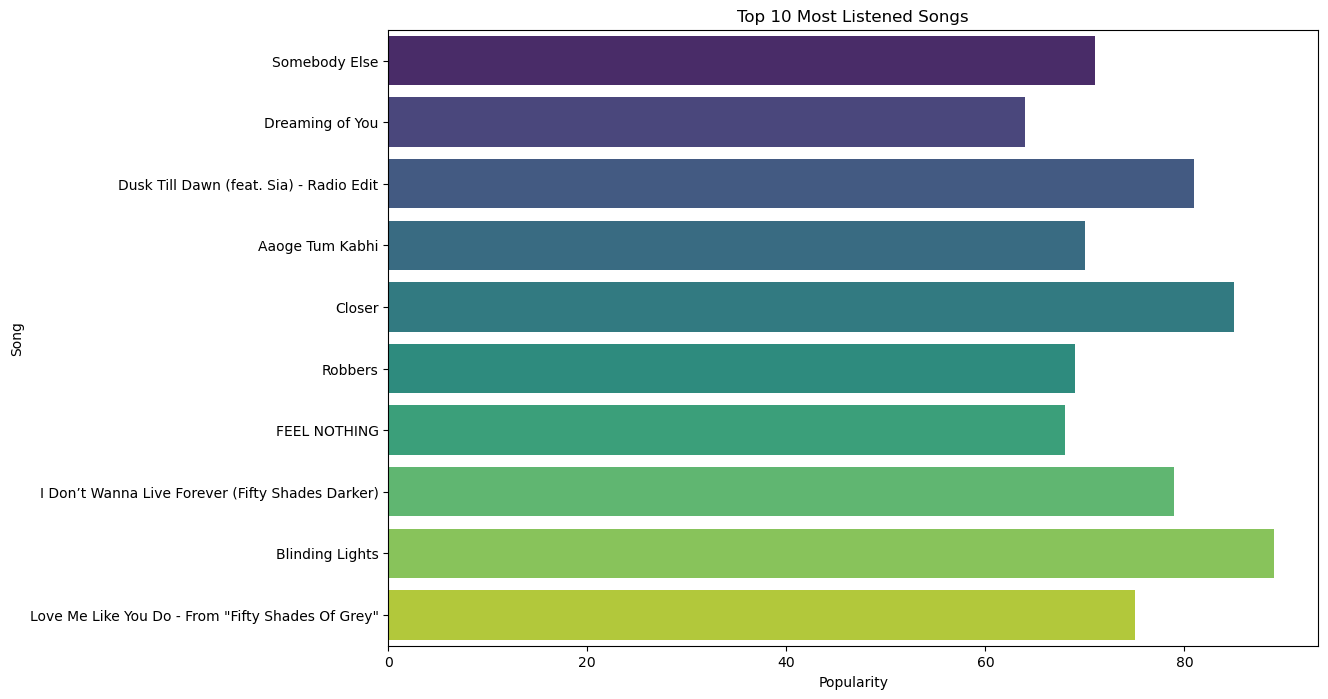

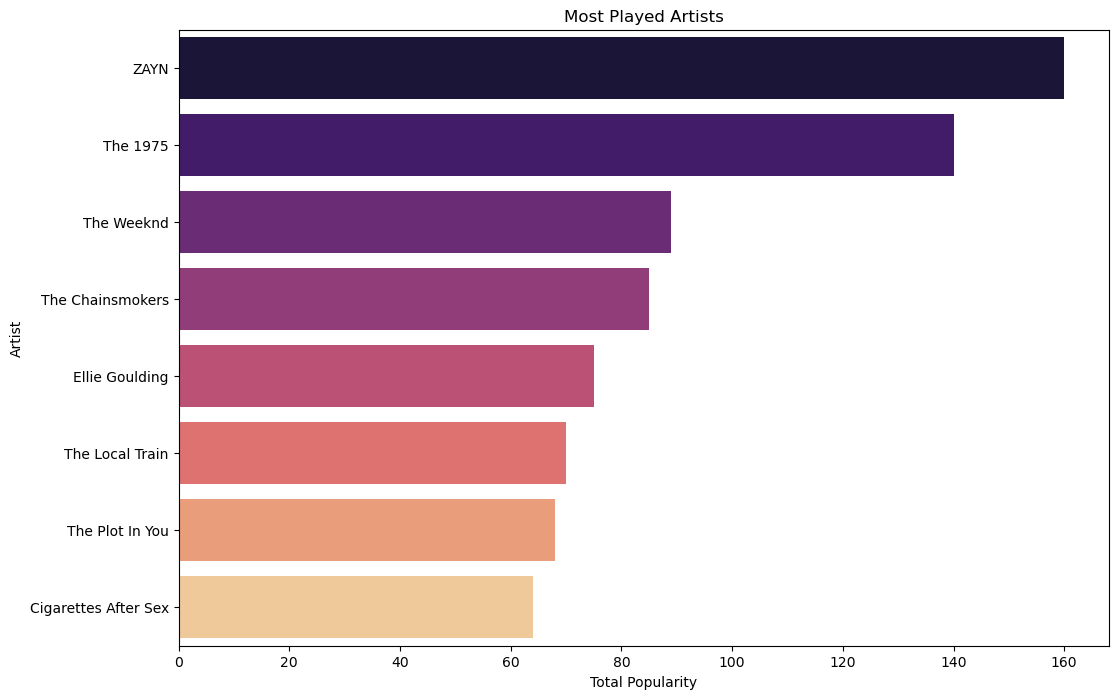

In [11]:
main()